# **BIG DATA FRAMEWORKS FINAL CODE**



In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pwd

/content


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.3-bin-hadoop3.2.tgz   #extract the file using the tar command
!pip install -q findspark     #install python package 

spark-3.0.3-bin-hadoop3.2/
spark-3.0.3-bin-hadoop3.2/NOTICE
spark-3.0.3-bin-hadoop3.2/kubernetes/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop3.2/jars/
spark-3.0.3-bin-hadoop3.2/jars/hive-

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
spark = SparkSession.builder.master("local[4]").getOrCreate()

In [ ]:
import pyspark
from pyspark.context import SparkContext 

from pyspark import SparkConf 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[4]"))

In [ ]:
import sys
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
sqlContext = SQLContext(sc)
sqlContext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =(spark.read
          .format('csv')
          .option('header', 'false')
          .load('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'))

df.show()

Loading the Twitter Sentimental Analysis dataset



In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding='latin-1')
# above line will be different depending on where you saved your data, and your file name
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print("Shape of dataframe is: {}".format(df.shape))

Shape of dataframe is: (20000, 6)


In [ ]:
#Get the column data types
df.dtypes

sentiment        int64
id               int64
date            object
query_string    object
user            object
text            object
dtype: object

In [ ]:
df.sentiment.value_counts()

4    10001
0     9999
Name: sentiment, dtype: int64

We are checking for Class imbalance by checking the number of positive and negative tweets in the sentiment feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


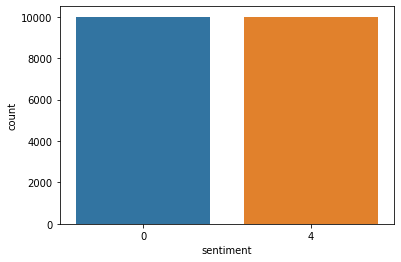

In [ ]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [ ]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [ ]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [ ]:
df[df.sentiment == 4].head(10)

,sentiment,text
9999,4,@LilPecan i thought you live in a gun-control ...
10000,4,@michaelahills YEP
10001,4,need to do homework.. can't wait for LVATT.. i...
10002,4,"@AnneSudworth Gosh, that's hectic... Tea? I'm ..."
10003,4,@hana77 Daily: 8am - 12 midnight
10004,4,watching the staff in the posh Soho face cream...
10005,4,@samanatrix @Boxtech @Vaancor @MuertenTheSNW M...
10006,4,@evAllTimeLow i met them at soundwave they di...
10007,4,"@billpetti: I agree they are symbiotic, and I ..."
10008,4,@kikilupo that's the bright side!


In [ ]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [ ]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
print(data_dict)

{'sentiment': {'type': dtype('int64'), 'description': 'sentiment class - 0:negative, 1:positive'}, 'text': {'type': dtype('O'), 'description': 'tweet text'}, 'pre_clean_len': {'type': dtype('int64'), 'description': 'Length of the tweet before cleaning'}, 'dataset_shape': (20000, 3)}


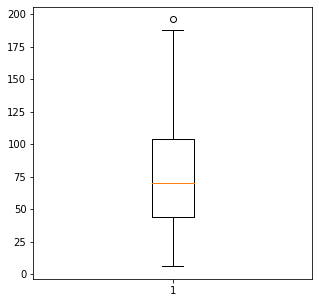

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [ ]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [ ]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [ ]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [ ]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [ ]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

In [ ]:
from bs4 import BeautifulSoup 

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process , it has created unnecessay white spaces,
    # Lets tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
                
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [ ]:
example1 = BeautifulSoup(df.text[279], 'lxml')
print (example1.get_text())
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [ ]:
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [ ]:
import re
nums = [0,20000]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print( "Tweets %d of %d has been processed" % ( i+1, nums[1] )    )                                                                
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 20000 has been processed
Tweets 20000 of 20000 has been processed


In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [ ]:
clean_df['clean_len'] = [len(t) for t in clean_df.text]

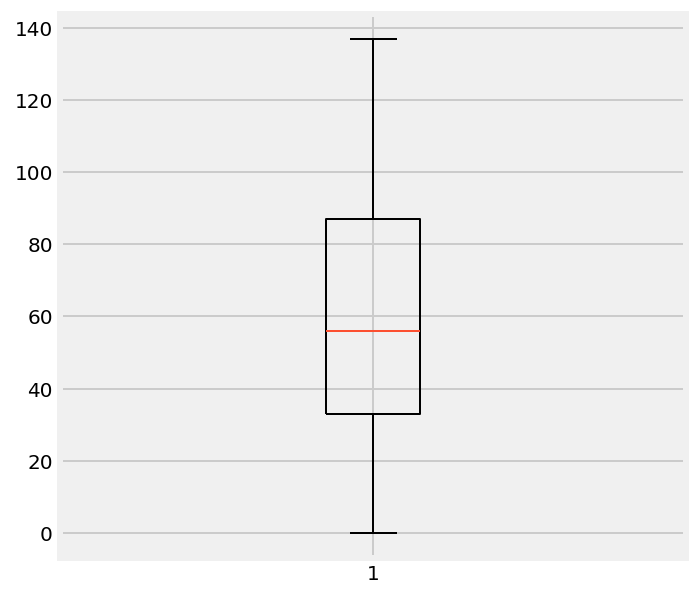

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(clean_df.clean_len)
plt.show()

In [ ]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target,clean_len
0,awww that bummer you shoulda got david carr of...,0,65
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it not behaving at all mad why am here beca...,0,80


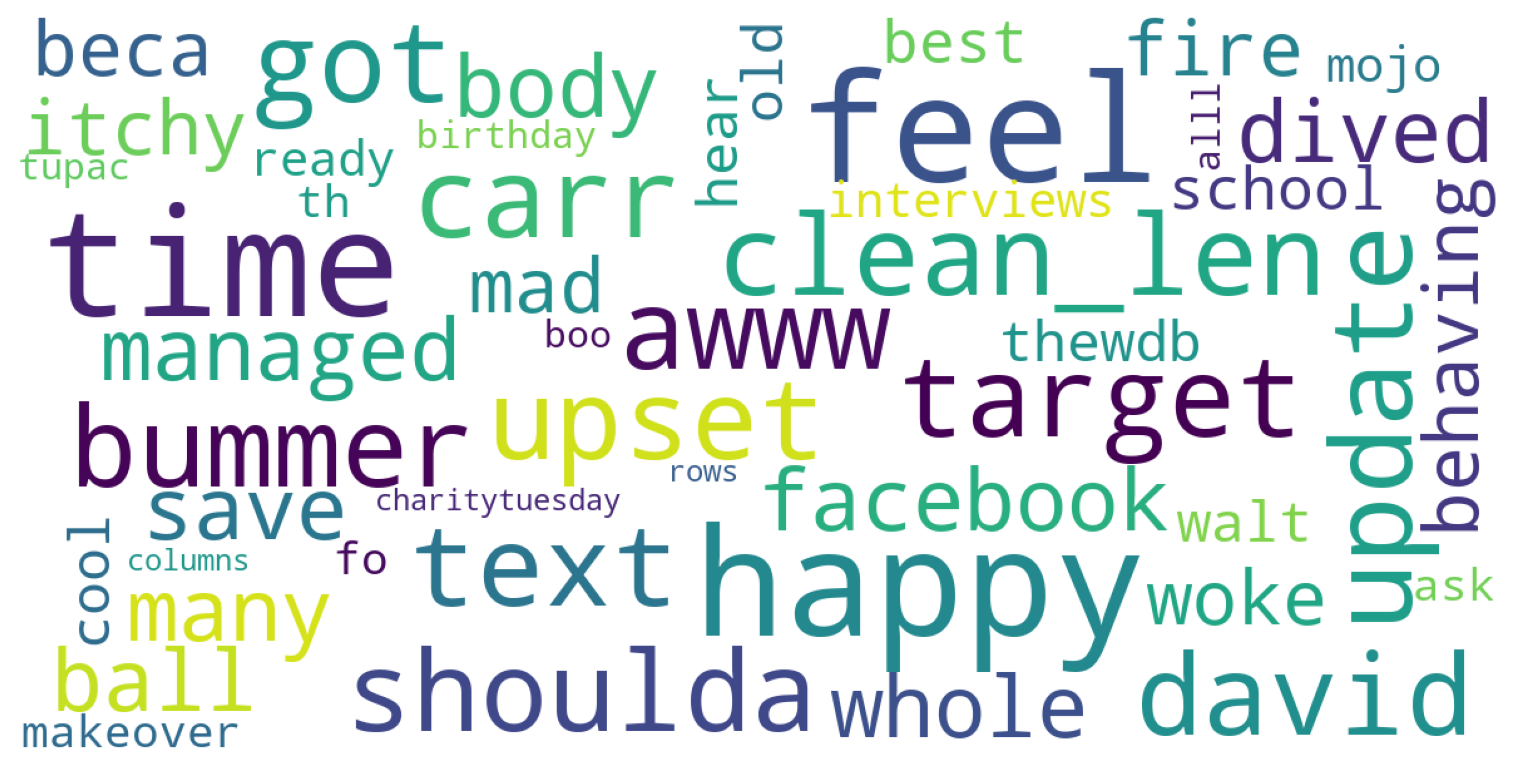

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(my_df)

# **SPARKS SQL**

In [ ]:
import sys
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pyspark as ps

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
spark = SparkSession.builder.master("local[4]").getOrCreate()

In [ ]:
import pyspark
from pyspark.context import SparkContext 

from pyspark import SparkConf 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[4]"))

In [ ]:
sqlContext = SQLContext(sc)
sqlContext

In [ ]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('clean_tweet.csv')

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- target: integer (nullable = true)
 |-- clean_len: integer (nullable = true)



In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.show(5)

+---+--------------------+------+---------+
|_c0|                text|target|clean_len|
+---+--------------------+------+---------+
|  0|awww that bummer ...|     0|       65|
|  1|is upset that he ...|     0|      105|
|  2|dived many times ...|     0|       71|
|  3|my whole body fee...|     0|       46|
|  4|no it not behavin...|     0|       80|
+---+--------------------+------+---------+
only showing top 5 rows



In [ ]:
df=df.dropna()

In [ ]:
df.count()

19958

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

dataset = df.sample(0.10).toPandas()

In [ ]:
values = dataset['target'].value_counts().keys().tolist()
counts = dataset['target'].value_counts().tolist()

fig = px.pie(values=counts, names=['Postitive','Negative'], title='Feedback distribuition')
fig.show()

Splitting the dataset into train and test

In [ ]:
(train_set, val_set, test_set) = df.randomSplit([0.98, 0.01, 0.01], seed = 2000)

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "target", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])

pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
val_df = pipelineFit.transform(val_set)
train_df.show(5)

+---+--------------------+------+---------+--------------------+--------------------+--------------------+-----+
|_c0|                text|target|clean_len|               words|                  tf|            features|label|
+---+--------------------+------+---------+--------------------+--------------------+--------------------+-----+
|  0|awww that bummer ...|     0|       65|[awww, that, bumm...|(65536,[18354,216...|(65536,[18354,216...|  1.0|
|  1|is upset that he ...|     0|      105|[is, upset, that,...|(65536,[1981,3085...|(65536,[1981,3085...|  1.0|
|  2|dived many times ...|     0|       71|[dived, many, tim...|(65536,[2548,2888...|(65536,[2548,2888...|  1.0|
|  3|my whole body fee...|     0|       46|[my, whole, body,...|(65536,[1880,9243...|(65536,[1880,9243...|  1.0|
|  4|no it not behavin...|     0|       80|[no, it, not, beh...|(65536,[1968,8538...|(65536,[1968,8538...|  1.0|
+---+--------------------+------+---------+--------------------+--------------------+-----------

In [ ]:
train_df.count()

19570

In [ ]:
val_df.tail(10)

[Row(_c0=18934, text='let me see listened to can play with madness the clairvoyant mother russia and minutes to midnight', target=4, clean_len=98, words=['let', 'me', 'see', 'listened', 'to', 'can', 'play', 'with', 'madness', 'the', 'clairvoyant', 'mother', 'russia', 'and', 'minutes', 'to', 'midnight'], tf=SparseVector(65536, {8538: 1.0, 12130: 1.0, 14587: 1.0, 15910: 1.0, 23307: 1.0, 25414: 1.0, 27576: 2.0, 30353: 1.0, 34400: 1.0, 40055: 1.0, 42267: 1.0, 42901: 1.0, 48818: 1.0, 50001: 1.0, 58445: 1.0, 60930: 1.0}), features=SparseVector(65536, {8538: 3.628, 12130: 3.777, 14587: 0.0, 15910: 5.7875, 23307: 1.7374, 25414: 0.0, 27576: 2.4293, 30353: 1.3239, 34400: 7.1738, 40055: 6.9914, 42267: 4.6614, 42901: 2.8778, 48818: 6.6237, 50001: 2.3913, 58445: 5.1723, 60930: 2.6957}), label=0.0),
 Row(_c0=19131, text='like the new hair', target=4, clean_len=17, words=['like', 'the', 'new', 'hair'], tf=SparseVector(65536, {11650: 1.0, 24297: 1.0, 30353: 1.0, 61232: 1.0}), features=SparseVector(655

In [ ]:
val_df.count()

187

**Decision Tree**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_df)
predictions1 = dtModel.transform(val_df)

In [ ]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions1, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5346597462514417


**Random Forest Classifier**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_df)
predictions2 = rfModel.transform(val_df)

In [ ]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions2, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6645905420991927


**NAIVE BAYES**

In [ ]:
from pyspark.ml.classification import NaiveBayes 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
nb = NaiveBayes(modelType="multinomial")

In [ ]:
nbmodel = nb.fit(train_df)

In [ ]:
predictions_df = nbmodel.transform(val_df)
predictions_df.show(5, True)

+---+--------------------+------+---------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|_c0|                text|target|clean_len|               words|                  tf|            features|label|       rawPrediction|         probability|prediction|
+---+--------------------+------+---------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|135|            agh snow|     0|        8|         [agh, snow]|(65536,[19988,456...|(65536,[19988,456...|  1.0|[-54.872194047438...|[1.68730784359987...|       1.0|
|237|want tacos and ma...|     0|       46|[want, tacos, and...|(65536,[14013,233...|(65536,[14013,233...|  1.0|[-170.43375268799...|[0.99999719858520...|       0.0|
|513|dammit need to st...|     0|       36|[dammit, need, to...|(65536,[5660,1762...|(65536,[5660,1762...|  1.0|[-209.82521822276...|[1.03396716836989...|       1.0|
|537

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy") 
nbaccuracy = evaluator.evaluate(predictions_df) 
print("Test accuracy = " + str(nbaccuracy))

Test accuracy = 0.7754010695187166


**Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100)
lrModel = lr.fit(train_df)
predictions = lrModel.transform(val_df)

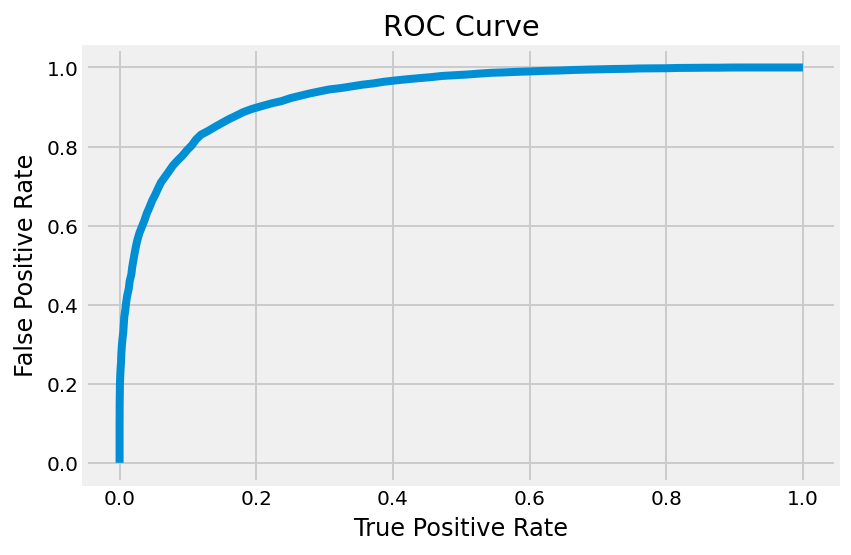

Training set areaUnderROC: 0.9311603984572168


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

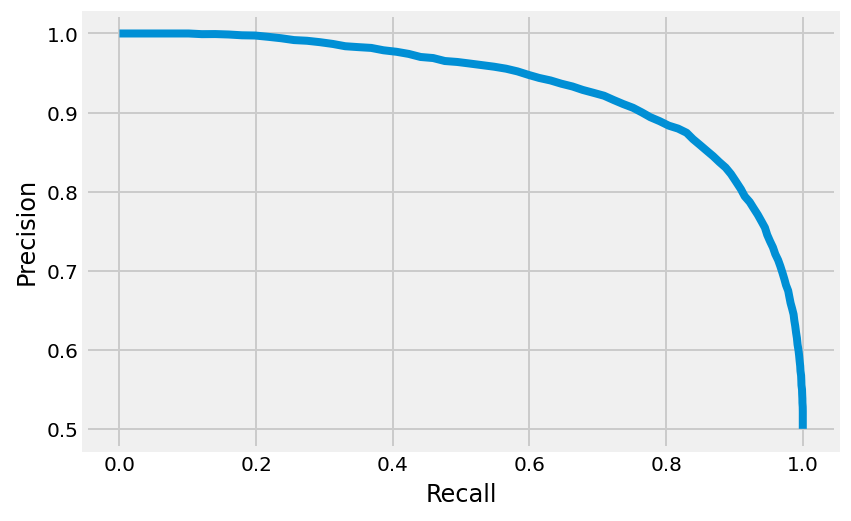

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

We are using Logistic Regression as it has ROC score as 0.93

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.8079584775086506

In [ ]:
evaluator.getMetricName()

'areaUnderROC'

In [ ]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
accuracy

0.7540106951871658

In [ ]:
%%time
from pyspark.ml.feature import CountVectorizer

tokenizer = Tokenizer(inputCol="text", outputCol="words")
cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "target", outputCol = "label")
lr = LogisticRegression(maxIter=100)
pipeline = Pipeline(stages=[tokenizer, cv, idf, label_stringIdx, lr])

pipelineFit = pipeline.fit(train_set)
predictions = pipelineFit.transform(val_set)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
roc_auc = evaluator.evaluate(predictions)

print ("Accuracy Score: {0:.4f}".format(accuracy))
print ("ROC-AUC: {0:.4f}".format(roc_auc))

Accuracy Score: 0.7594
ROC-AUC: 0.8201
CPU times: user 196 ms, sys: 17.8 ms, total: 214 ms
Wall time: 15.5 s


In [ ]:
from pyspark.ml.feature import NGram, VectorAssembler
from pyspark.ml.feature import ChiSqSelector

def build_trigrams(inputCol=["text","target"], n=3):
    tokenizer = [Tokenizer(inputCol="text", outputCol="words")]
    ngrams = [
        NGram(n=i, inputCol="words", outputCol="{0}_grams".format(i))
        for i in range(1, n + 1)
    ]

    cv = [
        CountVectorizer(vocabSize=2**14,inputCol="{0}_grams".format(i),
            outputCol="{0}_tf".format(i))
        for i in range(1, n + 1)
    ]
    idf = [IDF(inputCol="{0}_tf".format(i), outputCol="{0}_tfidf".format(i), minDocFreq=5) for i in range(1, n + 1)]

    assembler = [VectorAssembler(
        inputCols=["{0}_tfidf".format(i) for i in range(1, n + 1)],
        outputCol="rawFeatures"
    )]
    label_stringIdx = [StringIndexer(inputCol = "target", outputCol = "label")]
    selector = [ChiSqSelector(numTopFeatures=2**14,featuresCol='rawFeatures', outputCol="features")]
    lr = [LogisticRegression(maxIter=100)]
    return Pipeline(stages=tokenizer + ngrams + cv + idf+ assembler + label_stringIdx+selector+lr)

In [ ]:
from pyspark.ml.feature import NGram, VectorAssembler

def build_ngrams_wocs(inputCol=["text","target"], n=3):
    tokenizer = [Tokenizer(inputCol="text", outputCol="words")]
    ngrams = [
        NGram(n=i, inputCol="words", outputCol="{0}_grams".format(i))
        for i in range(1, n + 1)
    ]

    cv = [
        CountVectorizer(vocabSize=5460,inputCol="{0}_grams".format(i),
            outputCol="{0}_tf".format(i))
        for i in range(1, n + 1)
    ]
    idf = [IDF(inputCol="{0}_tf".format(i), outputCol="{0}_tfidf".format(i), minDocFreq=5) for i in range(1, n + 1)]

    assembler = [VectorAssembler(
        inputCols=["{0}_tfidf".format(i) for i in range(1, n + 1)],
        outputCol="features"
    )]
    label_stringIdx = [StringIndexer(inputCol = "target", outputCol = "label")]
    lr = [LogisticRegression(maxIter=100)]
    return Pipeline(stages=tokenizer + ngrams + cv + idf+ assembler + label_stringIdx+lr)

In [ ]:
%%time

trigramwocs_pipelineFit = build_ngrams_wocs().fit(train_set)
predictions_wocs = trigramwocs_pipelineFit.transform(val_set)
accuracy_wocs = predictions_wocs.filter(predictions_wocs.label == predictions_wocs.prediction).count() / float(val_set.count())
roc_auc_wocs = evaluator.evaluate(predictions_wocs)

# print accuracy, roc_auc
print ("Accuracy Score: {0:.4f}".format(accuracy_wocs))
print ("ROC-AUC: {0:.4f}".format(roc_auc_wocs))

Accuracy Score: 0.6952
ROC-AUC: 0.7609
CPU times: user 338 ms, sys: 62.7 ms, total: 401 ms
Wall time: 25.3 s
